In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Chebyshev:
    """
    Chebyshev(a, b, n, func)
    Given a function func, lower and upper limits of the interval [a,b],
    and maximum degree n, this class computes a Chebyshev approximation
    of the function.
    Method eval(x) yields the approximated function value.
    """
    def __init__(self, a, b, n, func):
        n = n + 1 
        self.a = a
        self.b = b
        self.func = func
        
        bma = 0.5 * (b - a)
        bpa = 0.5 * (b + a)
        f = [func(math.cos(math.pi * (k + 0.5) / n) * bma + bpa) for k in range(n)]
        self.roots = f
        
        self.x = [math.cos(math.pi * (k + 0.5) / n) * bma + bpa for k in range(n)]

        fac = 2.0 / n
        self.c = [fac * sum([f[k] * math.cos(math.pi * j * (k + 0.5) / n)
                  for k in range(n)]) for j in range(n)]

    def eval(self, x):
        a,b = self.a, self.b
        #assert(a <= x <= b)
        y = (2.0 * x - a - b) * (1.0 / (b - a))
        y2 = 2.0 * y
        (d, dd) = (self.c[-1], 0)             # Special case first step for efficiency
        for cj in self.c[-2:0:-1]:            # Clenshaw's recurrence
            (d, dd) = (y2 * d - dd + cj, d)
        return y * d - dd + 0.5 * self.c[0]   # Last step is different
    
    
def relu(x):
    if x > 0:
        return x
    return 0

In [166]:
a = -1
b = 1

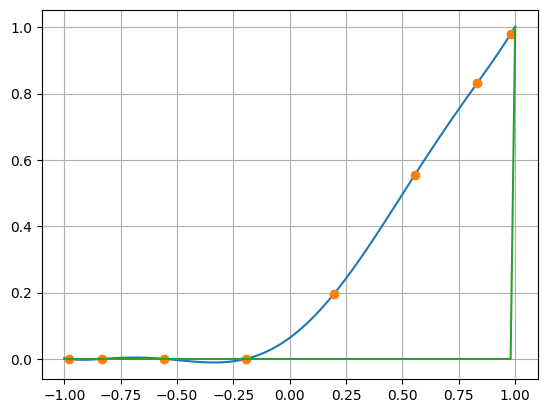

In [172]:
fun = relu
c = Chebyshev(a, b, 7, fun)

x = np.linspace(a, b, 100)
y = np.vectorize(c.eval)(x)


plt.grid()
plt.plot(x, y)
plt.plot(c.x, np.vectorize(fun)(c.x), 'o')
plt.plot(x, np.vectorize(fun)(x))
plt.show()

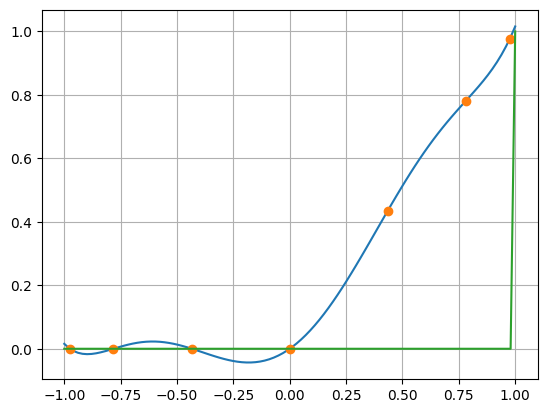

In [177]:
fun = relu
c = Chebyshev(a, b, 6, fun)

x = np.linspace(a, b, 100)
y = np.vectorize(c.eval)(x)


plt.grid()
plt.plot(x, y)
plt.plot(c.x, np.vectorize(fun)(c.x), 'o')
plt.plot(x, np.vectorize(fun)(x))
plt.show()

## $\ell_1$ norm

In [272]:
l1norms = []

for d in range(15,51):
    fun = relu
    c = Chebyshev(-1, 1, d, fun)

    x = np.linspace(-1, 1, 1000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    l1norms.append(np.linalg.norm(y - y_correct, ord=1))

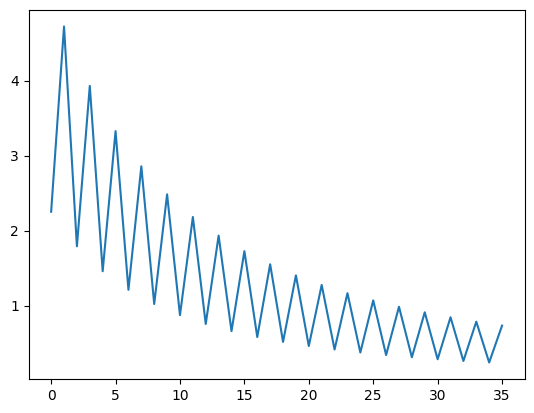

In [273]:
plt.plot(l1norms)

In [278]:
for i in range(len(l1norms)):
    print("(" +str(i+15) +", " + str(l1norms[i]) + ")" )

(15, 2.250400894868911)
(16, 4.720953043507923)
(17, 1.7892502274270705)
(18, 3.9284312415001112)
(19, 1.457065179777978)
(20, 3.325903535044949)
(21, 1.209486396137838)
(22, 2.856402559570247)
(23, 1.0201227637087378)
(24, 2.4825716723315114)
(25, 0.8721420043854742)
(26, 2.1803796532311135)
(27, 0.7541567660810073)
(28, 1.9318093489504096)
(29, 0.6586178168182673)
(30, 1.7245866366241056)
(31, 0.5799896744870657)
(32, 1.550188502404395)
(33, 0.5149362698849398)
(34, 1.4022145817299525)
(35, 0.46009933688924515)
(36, 1.2744432142092719)
(37, 0.4135245380428889)
(38, 1.1645562332872825)
(39, 0.373732039050077)
(40, 1.0683872849029603)
(41, 0.3394746476740722)
(42, 0.9837751950993128)
(43, 0.3096929465827739)
(44, 0.9096802682064369)
(45, 0.28371840571043366)
(46, 0.8435890334869125)
(47, 0.26075276666832437)
(48, 0.7848348677715098)
(49, 0.24055130723816365)
(50, 0.7319125215046312)


### $\ell_\infty$ norm

In [274]:
linfnorms = []

for d in range(15,51):
    fun = relu
    c = Chebyshev(-1, 1, d, fun)

    x = np.linspace(-1, 1, 1000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    linfnorms.append(np.linalg.norm(y - y_correct, ord=np.inf))

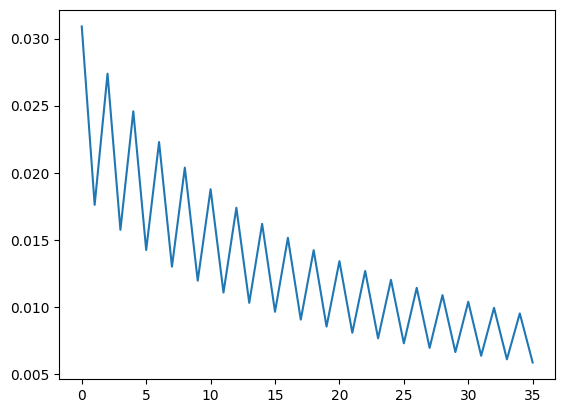

In [275]:
plt.plot(linfnorms)

In [279]:
for i in range(len(linfnorms)):
    print("(" +str(i+15) +", " + str(linfnorms[i]) + ")" )

(15, 0.0309026237980502)
(16, 0.017604506910399664)
(17, 0.027385548466934362)
(18, 0.015742967639504724)
(19, 0.024579214179492048)
(20, 0.014236857711243223)
(21, 0.022287481072018056)
(22, 0.012996140612764717)
(23, 0.020380433175386736)
(24, 0.011953375959242951)
(25, 0.018768561414580776)
(26, 0.011066253455335517)
(27, 0.017388166280513317)
(28, 0.010299424504135124)
(29, 0.016192669534232706)
(30, 0.009635760258661308)
(31, 0.015147217874442731)
(32, 0.009049131480932004)
(33, 0.01422520848767228)
(34, 0.00852967649423575)
(35, 0.01340598201841231)
(36, 0.008068056021760805)
(37, 0.01267324925396146)
(38, 0.007655358244550103)
(39, 0.012013992803704243)
(40, 0.007282994735477832)
(41, 0.011417684378198178)
(42, 0.006942590265795356)
(43, 0.010875716641086164)
(44, 0.006630245427929338)
(45, 0.010380983969728808)
(46, 0.006352573014398621)
(47, 0.00992756847496995)
(48, 0.006087592811083953)
(49, 0.009510501672174043)
(50, 0.005853830389212222)


### Precision bits

In [70]:
c = Chebyshev(-1, 1, 20, relu)


x = np.linspace(-1, 1, 10000)
y = np.vectorize(c.eval, otypes=[float])(x)

y_correct = np.vectorize(relu, otypes=[float])(x)

error = np.abs(y - y_correct)

# Avoid log2(0) by clipping the error
error = np.clip(error, 1e-16, None)

precision_bits = -np.log2(error)

min(precision_bits)

6.134095012872159

In [71]:
c = Chebyshev(-1, 1, 38, relu)


x = np.linspace(-1, 1, 10000)
y = np.vectorize(c.eval, otypes=[float])(x)

y_correct = np.vectorize(relu, otypes=[float])(x)

error = np.abs(y - y_correct)

# Avoid log2(0) by clipping the error
error = np.clip(error, 1e-16, None)

precision_bits = -np.log2(error)

min(precision_bits)

7.029019260381234

In [72]:
c = Chebyshev(-1, 1, 76, relu)


x = np.linspace(-1, 1, 10000)
y = np.vectorize(c.eval, otypes=[float])(x)

y_correct = np.vectorize(relu, otypes=[float])(x)

error = np.abs(y - y_correct)

# Avoid log2(0) by clipping the error
error = np.clip(error, 1e-16, None)

precision_bits = -np.log2(error)

min(precision_bits)

8.010967667842095

In [73]:
c = Chebyshev(-1, 1, 156, relu)


x = np.linspace(-1, 1, 10000)
y = np.vectorize(c.eval, otypes=[float])(x)

y_correct = np.vectorize(relu, otypes=[float])(x)

error = np.abs(y - y_correct)

# Avoid log2(0) by clipping the error
error = np.clip(error, 1e-16, None)

precision_bits = -np.log2(error)

min(precision_bits)

9.038954420586391

In [69]:
c = Chebyshev(-1, 1, 310, relu)


x = np.linspace(-1, 1, 10000)
y = np.vectorize(c.eval, otypes=[float])(x)

y_correct = np.vectorize(relu, otypes=[float])(x)

error = np.abs(y - y_correct)

# Avoid log2(0) by clipping the error
error = np.clip(error, 1e-16, None)

precision_bits = -np.log2(error)

min(precision_bits)

10.025166841551176